# Assignment 2: Implementing Feedforward neural networks with Keras and TensorFlow

## a. Import the necessary packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np

## b. Load the training and testing data (MNIST/CIFAR10)

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()
len(train_images)

60000

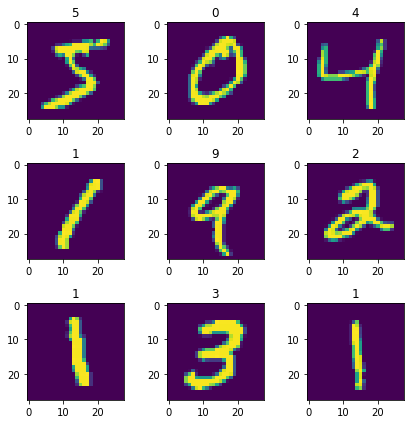

In [3]:
# Define the number of rows and columns for the grid
num_rows, num_cols = 3, 3
num_images = num_rows * num_cols

# Create a grid of images
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(train_images[i])
    plt.title(str(train_labels[i]))

plt.tight_layout()
plt.show()

The lines `x_train = x_train/255` and `x_test = x_test/255` are performing a common preprocessing step in machine learning called **normalization**. In the context of image data, especially grayscale images like those in the MNIST dataset, pixel values usually range from 0 to 255. Normalization scales these pixel values to a range between 0 and 1.

Dividing each pixel value by 255 effectively transforms the pixel values from the original range [0, 255] to the normalized range [0, 1]. Normalization is important because it ensures that all features (in this case, pixel values) have a similar scale. This can help improve the convergence and training stability of neural networks.

Additionally, normalizing the data prevents issues where certain features with larger scales dominate the learning process, leading the model to be biased toward those features. By bringing all the features to a similar scale, normalization helps the neural network learn the underlying patterns in the data more effectively, which can result in better model performance.

In [4]:
train_images = train_images/255
test_images = test_images/255

## c. Define the network architecture using Keras

In [5]:
model = keras.Sequential([ # the model starts with a Flatten layer to prepare the input.
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

This code defines a neural network model using the Keras API, which is a high-level neural networks API running on top of TensorFlow. The model is designed for the MNIST dataset, which consists of 28x28 grayscale images of handwritten digits (0 through 9).

```python
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer to prepare the input (28x28 images are flattened into 1D arrays)
    keras.layers.Dense(128, activation='relu'),  # Fully connected dense layer with 128 units and ReLU activation function
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units (for 10 classes) and softmax activation function
])
```

1. **`keras.layers.Flatten(input_shape=(28, 28))`:** The first layer of the model is a Flatten layer. It transforms the 2D array representing the 28x28 pixel images into a 1D array of 784 pixels. This flattening process is necessary to convert the image data into a format that can be processed by the subsequent dense layers. The `input_shape=(28, 28)` argument specifies the shape of the input data, which is 28x28 pixels for each image.

2. **`keras.layers.Dense(128, activation='relu')`:** After flattening the input, the data is passed through a dense (fully connected) layer with 128 units (neurons). Each neuron in this layer receives input from all 784 pixels of the flattened image. The activation function used in this layer is ReLU (Rectified Linear Unit), which introduces non-linearity into the model. ReLU is commonly used in hidden layers of neural networks as it helps the network learn complex patterns in the data.

3. **`keras.layers.Dense(10, activation='softmax')`:** The final layer is another dense layer with 10 units. This layer represents the output layer of the network. Since the task is to classify the input images into 10 different classes (digits 0 through 9), the output layer has 10 units corresponding to these classes. The activation function used here is softmax, which calculates probabilities for each class. Softmax ensures that the sum of the probabilities for all classes is equal to 1, making it suitable for multi-class classification problems.

To summarize, the model takes 28x28 pixel images as input, flattens them into 1D arrays, processes them through a hidden layer with 128 neurons and ReLU activation, and finally outputs probabilities for each of the 10 classes using the softmax activation function. This architecture is a basic example of a neural network suitable for image classification tasks like MNIST digit recognition.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## d. Train the model using SGD

In [7]:
model.compile(optimizer='sgd', # stochastic gradient descent
             loss='sparse_categorical_crossentropy', # Use this crossentropy loss function when there are 
              #two or more label classes. We expect labels to be provided as integers, mutually exclusive events
             metrics=['accuracy']) # parameter is accuracy

The `model.compile()` function in Keras is used to configure the learning process of the neural network. It requires several arguments to be specified, including the optimizer, loss function, and evaluation metrics. Let's break down the provided code in detail:

```python
model.compile(optimizer='sgd',  # Stochastic Gradient Descent (SGD) optimizer
              loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy loss function
              metrics=['accuracy'])  # Metric to evaluate the model's performance: accuracy
```

1. **`optimizer='sgd'`:** The optimizer determines how the neural network's weights are updated during training. In this case, `'sgd'` refers to Stochastic Gradient Descent (SGD). SGD is a widely used optimization algorithm that updates the model's weights iteratively based on the gradients of the loss function with respect to the weights. It's called "stochastic" because it uses a subset of the training data (a batch) to compute gradients, making the optimization process faster and more scalable for large datasets.

2. **`loss='sparse_categorical_crossentropy'`:** The loss function (or objective function) quantifies how well the model is performing. For multi-class classification problems (where each input belongs to one of several classes), `'sparse_categorical_crossentropy'` is a suitable choice. It calculates the cross-entropy loss between the true labels and the predicted probabilities. In this context, "sparse" means that the true labels are integers rather than one-hot encoded vectors. The goal during training is to minimize this loss, which results in the model learning to make accurate predictions.

3. **`metrics=['accuracy']`:** Metrics are used to evaluate the model's performance during training and testing. In this case, the metric specified is `'accuracy'`. Accuracy measures the proportion of correctly classified samples out of the total number of samples. It's a commonly used metric for classification tasks and provides an intuitive understanding of the model's performance. During training, the optimizer tries to maximize accuracy by adjusting the model's weights.



In [8]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6422 - accuracy: 0.8361 - val_loss: 0.3573 - val_accuracy: 0.9015
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3357 - accuracy: 0.9061 - val_loss: 0.2913 - val_accuracy: 0.9167
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2873 - accuracy: 0.9192 - val_loss: 0.2581 - val_accuracy: 0.9265
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2580 - accuracy: 0.9272 - val_loss: 0.2397 - val_accuracy: 0.9313
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2358 - accuracy: 0.9337 - val_loss: 0.2251 - val_accuracy: 0.9356
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2178 - accuracy: 0.9385 - val_loss: 0.2045 - val_accuracy: 0.9408
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2027 - accuracy: 0.9424 - val_loss: 0.1931 - val_accuracy:

## e. Evaluate the network

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1659 - accuracy: 0.9519
Loss=0.166
Accuracy=0.952


313/313 [==============================] - 1s 1ms/step


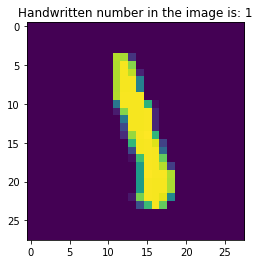

313/313 [==============================] - 1s 2ms/step


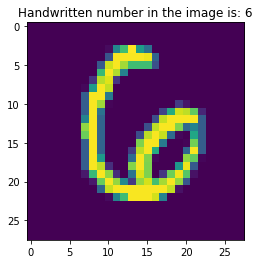

313/313 [==============================] - 0s 1ms/step


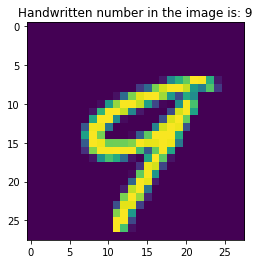

313/313 [==============================] - 0s 1ms/step


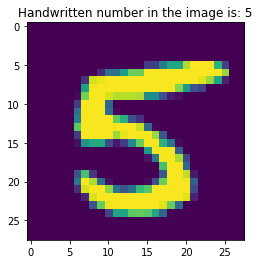

313/313 [==============================] - 0s 1ms/step


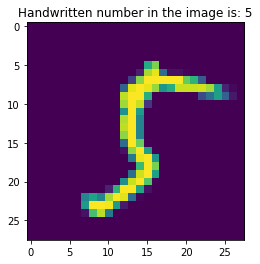

In [10]:
for i in range(5):
    n = random.randint(0,9999)
    plt.imshow(test_images[n])
    predicted_value=model.predict(test_images)
    plt.title("Handwritten number in the image is: %d" %np.argmax(predicted_value[n]))
    plt.show()

In the given code block, the `np.argmax()` function is used to obtain the index corresponding to the maximum value in the predicted output probabilities for each input image. Let me break down the code and explain why `np.argmax()` is used:


3. **Making Predictions:**
   ```python
   predicted_value = model.predict(x_test)
   ```
   The model's `predict()` method is used to obtain the predicted probabilities for all classes (digits 0 to 9) for all test images in the `x_test` array.

4. **Using `np.argmax()` to Get Predicted Digit:**
   ```python
   plt.title("Predicted value %d" % np.argmax(predicted_value[n]))
   ```
   - `predicted_value[n]` represents the predicted probabilities for the `n`-th test image.
   - `np.argmax(predicted_value[n])` returns the index (digit) with the highest probability from the predicted probabilities for the `n`-th test image.
   - `plt.title("Predicted value %d" % np.argmax(predicted_value[n]))` sets the title of the displayed image plot to show the predicted digit.

Using `np.argmax()` is essential in this context because it helps identify which digit the model predicts based on the highest probability among the output probabilities. The index with the maximum probability corresponds to the predicted digit for a given test image.

## f. Plot the training loss and accuracy

### Training Accuracy 

Training Accuracy:
Training accuracy measures the model's ability to correctly classify training samples. It represents the percentage of accurately predicted samples out of the total training data. Maximizing training accuracy indicates the model's proficiency in learning the training dataset's patterns, although it may not guarantee strong generalization on unseen data.


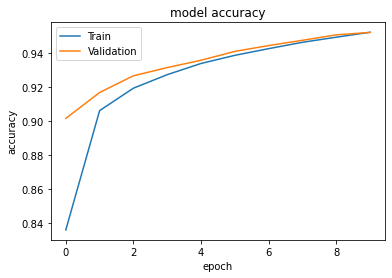

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Training Loss

Training Loss:
Training loss quantifies the disparity between predicted and actual values during training. Minimizing this metric ensures the model's predictions align closely with ground truth, enhancing its accuracy and effectiveness in making predictions.

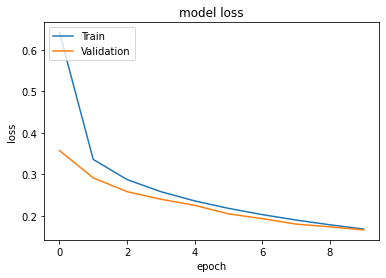

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()